# Quadruple Tank Process (QTP) example

In [1]:
#######################################################################################################################
#################################################### Initialisation ###################################################
#######################################################################################################################
## Import closed loop simulation methods
from closed_loop_simulation import *

## Import test problem
## ...
## This class has defined; State, measurement and output methods, a simulation_step method which solves the
## state differential equation defining the model, as well as a continuous linearisation method returning system
## matrices for the continuous linear system.
#from quadruple_tank_process import qtp

## Initial values for test process in MPC
#x0 = matrix( [10000.0, 10000.0, 10000.0, 10000.0] ) # Initial state
#u0 = matrix( [250.0, 250.0] )                       # Initial input

## Initialisation of MPC related parameters
#T_s         = 16                                    # Discretisation step
#n           = 30                                    # Prediction step for MPC
#r           = matrix( [ 25, 10 ] )                  # Desired output level
#r_c         = matrix( [ 20, 20  ] )                 # Increase in set-point
#disturbance = matrix( [ 100.0, 50.0 ] )             # Disturbance, 2/3rds through
#u_min       = matrix( [ 1e-2, 1e-2 ] )              # Minimum allowed input
#u_max       = matrix( [ 500.0, 500.0 ] )            # Maximum allowed input

## Off-set free parameters
#Q_d         = 1e+4

## Input constraints
#du_max      = 20                                    # Maximum allowed change input per step

## Soft output constraints
#soft_bounds = matrix( [ 1.0, 1.0 ] )                # Soft output bounds

dare converged to tolerance of 1e-8. Used 46 iterations.


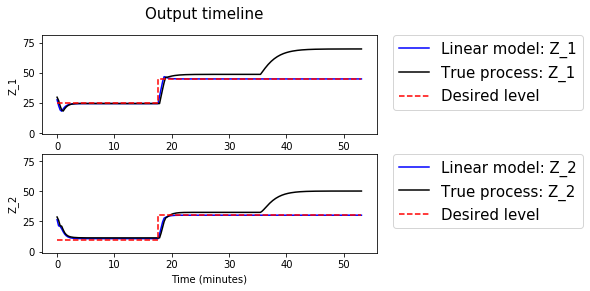

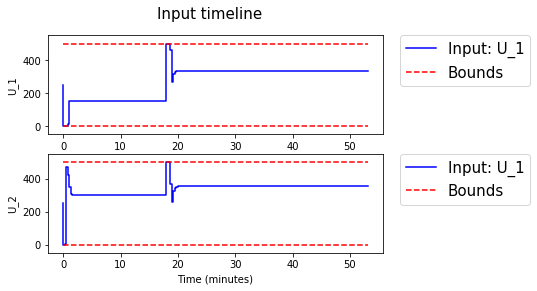

In [2]:
#######################################################################################################################
###################################################### Naive LMPC #####################################################
#######################################################################################################################
## Initialisation
off_set = 'off'
constraints = None

## Call closed loop simulation of MPC
Z_model, Z_true, U_plot = closed_loop_simulation( off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
fig1, ax1, fig2, ax2    = closed_loop_plot( Z_model, Z_true, U_plot )
fig1.savefig('figures/qtp_naive_lmpc_ouput', bbox_inches='tight' )
fig2.savefig('figures/qtp_naive_lmpc_input', bbox_inches='tight' )

dare converged to tolerance of 1e-8. Used 36 iterations.


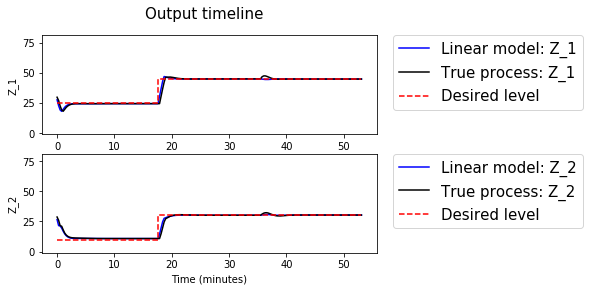

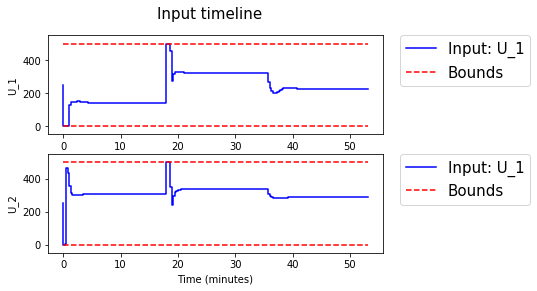

In [3]:
#######################################################################################################################
####################################################### OF-LMPC #######################################################
#######################################################################################################################
## Initialisation
off_set = 'on'
constraints = None

## Call closed loop simulation of MPC
Z_model, Z_true, U_plot = closed_loop_simulation( off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
fig1, ax1, fig2, ax2    = closed_loop_plot( Z_model, Z_true, U_plot )
fig1.savefig('figures/qtp_of_lmpc_ouput', bbox_inches='tight' )
fig2.savefig('figures/qtp_of_lmpc_input', bbox_inches='tight' )

dare converged to tolerance of 1e-8. Used 36 iterations.


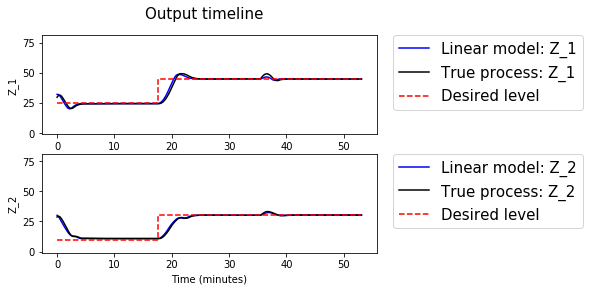

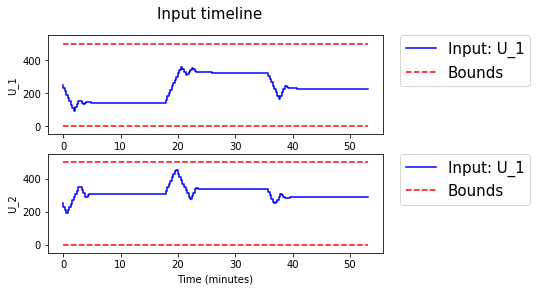

In [4]:
#######################################################################################################################
############################################## Input constrained OF-LMPC ##############################################
#######################################################################################################################
## Initialisation
off_set = 'on'
constraints = 'input'

## Call closed loop simulation of MPC
Z_model, Z_true, U_plot = closed_loop_simulation( off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
fig1, ax1, fig2, ax2    = closed_loop_plot( Z_model, Z_true, U_plot )
fig1.savefig('figures/qtp_input_of_lmpc_ouput', bbox_inches='tight' )
fig2.savefig('figures/qtp_input_of_lmpc_input', bbox_inches='tight' )

dare converged to tolerance of 1e-8. Used 36 iterations.


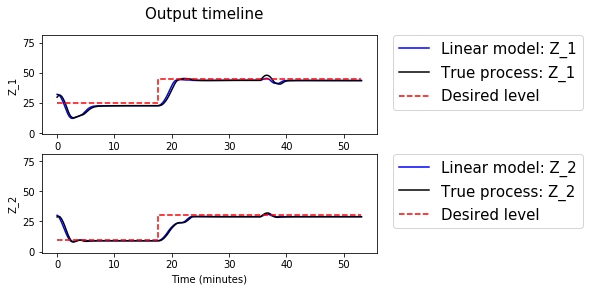

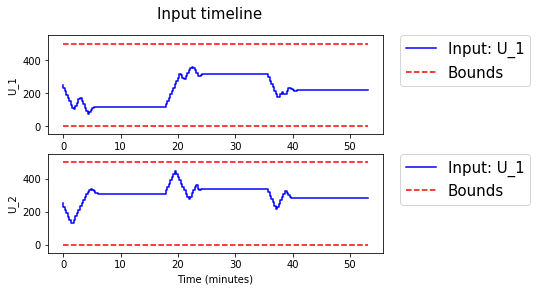

In [5]:
#######################################################################################################################
######################################## Input/soft-output constrained OF-LMPC ########################################
#######################################################################################################################
## Initialisation
off_set = 'on'
constraints = 'soft_output' # Focussed on not overshooting

## Call closed loop simulation of MPC
Z_model, Z_true, U_plot = closed_loop_simulation( off_set=off_set, constraints=constraints )

## Call plot method - Still hard-coded
fig1, ax1, fig2, ax2    = closed_loop_plot( Z_model, Z_true, U_plot )
fig1.savefig('figures/qtp_output_input_of_lmpc_ouput', bbox_inches='tight' )
fig2.savefig('figures/qtp_output_input_of_lmpc_input', bbox_inches='tight' )